# Neural Networks and Deep Learning
- This will introduce basic concepts regarding neural networks and is by no-means comprehensive.  
- Neural networks can cover multiple full courses, so this only scratches the surface.  
- See the readings and resources section for resources for more information.

## Artificial Neural Networks (ANN)
- Introduced in 1943, based on the concept of biological neurons.  
- Generally used for image, speech, and text classification.  
- It can be used in similar cases as we've seen for other examples, though the performance is generally similar to other models we've talked about.
  
## Biological Neurons

<img src='files/diagrams/brain.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition Pg. 20](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch02/images)

- Built upon how the brain works to intake information, process and extrapolate it, and make decisions.  
- Neurons can make very complex decisions.  
- Artificial neurons perform various logical computations:

<img src='files/diagrams/neuron-logic.png' stype='width: 500px'>

- The brain uses `neurons`, but neural networks approximate this bahavior with `units` and `layers`.  
- Neural networks have been around since the 1940s, but have become more popular in the last 20 years, coinciding with advancements in computing.  
- The revolution really started in the 1980s, after a technique called backpropagation was developed, which makes deep neural networks much more efficient to compute.  

## The Potential
- Realistic potential in changing how humans live their lives:  
    - Self-driving cars. 
    - Universal language translaters.  
    - Semi-autonomous robots for manual/menial work.  
    - Vaccine development.  
    - "Metaverse"  
    - ...  
- Not quite there yet though...   
    - Intuition without hard data.  
    - Computing.  
    - Training data with labels.  
    - Ethical decisions.  

## Single Layer (aka `Logistic Regression`)
- Simpliest ANN architecture.  
- Input layer and output layer.  
- The activation function normalizes the output. Logistic regression uses a sigmoid function, but there are others that may be more robust for your neural network models.  
- Instead of coefficients we will call these weights.  
- The constant ($B_0$) is referred to as a `bias unit`.  

<img src='files/diagrams/singlelayer.png' style='width: 500px'>


[Image source Machine Learning with Python 3rd Edition Pg. 386](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- The logistic regression model we manually created in [Week 6](https://github.com/appliedecon/data602-lectures/tree/main/week06) is essentially a single-layer neural network that uses a sigmoid activation function.

We can think of this `single layer` as $y=f(x)$

## Hidden Layers
<img src='files/diagrams/multilayer.png' style='width: 600px'>


[Image source Machine Learning with Python 3rd Edition Pg. 388](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- Many different types of neural networks. This is a feedforward, fully connected network, also called a `Multi-layer Perceptron (MLP)`.  
- Think of these as nested functions, with a 3-layer specified as:
$$
y = f_{NN}(x)=f_3(f_2(f_1(x)))
$$

- Allows complex, non-linear, relationships to be learned. However, the non-linearity is approximated by a series of nested linear functions.    
- $a_0^{(in)}$ and $A_0^{(h)}$ are bias units, and will equal $1$.  
- The output of each unit gets passed into an activation function to normalize the output and allow for non-linear approximations.  
- If there was not an activation functions, chains of linear combinations will only result in a linear transformation and that wouldn't be able to capture complexities of higher-order problems, i.e., a deep network without activation functions would be the same as a single-layer network.  

Recall:
$$
y = f_{NN}(x)=f_3(f_2(f_1(x)))
$$

Individually these functions will be represented as:
$$
f_l(z)=g_l(W_{lz}+b_t)
$$

- $l$ is the layer
- $g_l$ is the activation function, which requires a matrix of weights, $W_l$, and a vector, $b_l$ for each layer. $g_l$ can be any of the functions detailed below.  
- Theoretically, a deep neural network can capture any continuous function when activation functions are used.  

Linear Activation (regression): 
$$
\phi(x) = z
$$

Sigmoid (logistic regression, ANN):
$$
\phi(z)=\frac{1}{1+e^{-z}}
$$

Hyperbolic tangent - tanh (ANN):
$$
\phi(z)=\frac{e^z-e^{-z}}{e^z+e^{-z}}
$$

ReLU (ANN):
$$
\phi(z)= \begin{cases}
    0, & \text{if}\ z<0\\
    z, & \text{if}\ z>0
    \end{cases}
$$

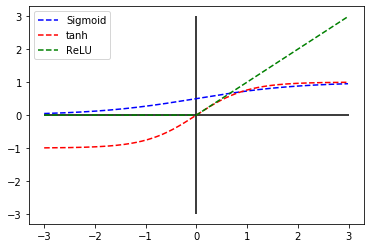

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

z = np.arange(-3.0, 3.0, 0.01)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))

def relu(z):
    return np.where(z<0, 0, z)
    
plt.plot(z, sigmoid(z), 'b--')
plt.plot(z, tanh(z), 'r--')
plt.plot(z, relu(z), 'g--')
plt.legend(['Sigmoid','tanh', 'ReLU'])
plt.hlines(0, -3, 3)
plt.vlines(0, -3, 3)
plt.show()

- Generally, `ReLu` is the default activation function that you should use, but it really could be treated `hyperparameter`. This is because its derivative is always 1 (derivative of a constant $=1$) for positive values so it addresses issues that arise from gradients that approach zero (`vanishing gradients`).  
- The output layer will have a unit per class, which generalizes the `one-versus-all` technique (below image is for a 3-class problem). For a binary class, this output layer would have only one unit.  

<img src='files/diagrams/12_03.png' style='width: 500px'>

[Image source Machine Learning with Python 3rd Edition Pg. 390](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)


- `Number of layers` and `number of units` are hyperparameters that will need to be tuned.  

#### The `hidden layers` can represent "concepts" or "features" that aren't explicitly in the data, but the network might discover a latent approximation.
You won't know what these are, but the neural net may infer them.

<img src='files/diagrams/housing_price.png' style='width: 600px'>

[Image source Andrew Ng](https://www.youtube.com/watch?v=n1l-9lIMW7E&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=3)

### Basic Process
- Start at input layer, propagate patterns of training data through to the output layer.  
- Calculate the error we want to minimize (cost function). Similar to how we implemented the gradient descent algorithm in the past.    
- **NEW** - Backpropagate error by finding its derivative to each weight and update the model. The below diagram illusrates backpropagation:  

<img src='files/diagrams/12_12-back.png' style='width: 600px'>

[Image source Machine Learning with Python 3rd Edition Pg. 421](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)

- See [numpy's examples](https://numpy.org/numpy-tutorials/content/tutorial-deep-learning-on-mnist.html) for a manual implementation of a neural network.  
- Typically use `mini-batch` for training - samples of the data during each weight update.  
- Training can be more complicated because there can be millions of weights that need to be trained with deep neural networks. Getting stuck in `local minimas` can be a problem.

<img src='files/diagrams/12_13-cost.png' style='width: 500px'>

[Image source Machine Learning with Python 3rd Edition Pg. 422](https://github.com/rasbt/python-machine-learning-book-3rd-edition/tree/master/ch12)


### Implementations and Frameworks

- [scikit-learn has an implementation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html) but it isn't intended for large-scale problem since scikit-learn doesn't have GPU support.  
- Most common packages/frameworks:  
    - [TensorFlow](https://www.tensorflow.org)  
    - [Keras](https://keras.io)  
    - [PyTorch](https://pytorch.org)  
    - [mxnet](https://mxnet.apache.org/versions/1.8.0/)  
- We'll show a simple examle using scikit learn's implementation, then focus on `keras`, since the APIs available are relatively simple compared to the other frameworks.    

### Tuning
Tuning can be very complicated for ANNs, especially for deep neural networks. Potential hyperparameters:
- Number of layers - additional layers instead of more units might be more effective.  
- Number of units.  
- Activation function `at each layer`.  
- Weight initialization (typically random, but can be anything).  
- Solver.  
- Batch size - if you have a GPU, use the largest batch than fits on the GPU for maximum performance.  
- Learning rate - arguably the most important.  
- Iterations.  
- Shape of deeper layers.  
- Convolutions and filters.  
- Wide and deep?  
- ...  

This is why it takes a lot of effort and compute to train certain models. Since there are so many potential levers for performance gains, usually `improvements` are released iteratively.

[A Disciplined Approach to Neural Network Hyper-Parameters](https://arxiv.org/abs/1803.09820)  
- No perfect way to go about looking for the best hyper-parameters.  
- Grid or Random search is an option, but computationally expensive.  
- Many cheat by using an existing model, e.g., AlexNet.  
- Best practices:
    - Look at the loss curves for clues about the suitability of the learning rate (under/over-fitting).  
    - Batch size is somewhat constrained by your computing environment (data $\le$ memory).  
    - Smaller batches add a little regularization.  

# Simple Implementation
[Based on Alex Trask's `Grokking Deep Learning`](https://github.com/iamtrask/Grokking-Deep-Learning)

**Learning with Gradient Descent**

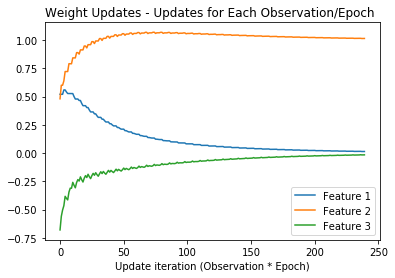

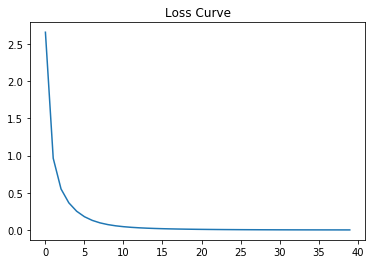

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# inital weights
weights = np.array([0.5,0.48,-0.7])

# learning rate
alpha = 0.1

# data on street lights
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ],
                          [ 0, 1, 1 ],
                          [ 1, 0, 1 ] ] )

# target variable: cross the street or not
walk_vs_stop = np.array( [ 0, 1, 0, 1, 1, 0 ] )

# starting points
input = streetlights[0]
goal_prediction = walk_vs_stop[0]

weights_ = list()
preds_   = list()
errors_  = list()

# gradient descent to learn weights with 40 iterations
for iteration in range(40):
    
    # initial error
    error_for_all_lights = 0
    
    # loop through rows
    for row_index in range(len(walk_vs_stop)):
        # each observation/epoch will update weights
        input = streetlights[row_index]
        goal_prediction = walk_vs_stop[row_index]
        
        # dot product of input and weights
        prediction = input.dot(weights)
        
        # error of prediction against observed
        error = (goal_prediction - prediction) ** 2
        error_for_all_lights += error
        
        # gradient and weight update
        delta = prediction - goal_prediction
        weights = weights - (alpha * (input * delta))

        weights_.append(weights)
        preds_.append(prediction)
        
    errors_.append(error_for_all_lights)
    
plt.plot(weights_)
plt.title('Weight Updates - Updates for Each Observation/Epoch', loc='left')
plt.legend(['Feature 1', 'Feature 2', 'Feature 3'])
plt.xlabel('Update iteration (Observation * Epoch)')
plt.show()

plt.plot(errors_)
plt.title('Loss Curve')
plt.show()

### Add Hidden Layers and Units
- 3 Features x 4 Hidden Units = 12 weights from first layer  
- 4 hidden units. 

> 16 weights for the below example!

In [3]:
import numpy as np

np.random.seed(1)

# activation function for each weight
def relu(x):
    return (x > 0) * x 

# output function
def relu2deriv(output):
    return output>0

# learning rate and number of hidden units
alpha = 0.2
hidden_size = 4

# training data
streetlights = np.array( [[ 1, 0, 1 ],
                          [ 0, 1, 1 ],
                          [ 0, 0, 1 ],
                          [ 1, 1, 1 ] ] )

# labels
walk_vs_stop = np.array([[ 1, 1, 0, 0]]).T

# initial weights for layers
weights_0_1 = 2*np.random.random((3, hidden_size)) - 1
weights_1_2 = 2*np.random.random((hidden_size, 1)) - 1

# input layer, initial hidden layer, output layer
layer_0 = streetlights[0]
layer_1 = relu(np.dot(layer_0, weights_0_1))
layer_2 = np.dot(layer_1, weights_1_2)

# epochs and storeage
epochs = 60
errors_ = list()

from collections import defaultdict
l2_1_weights_ = defaultdict(list)
l1_0_weights_ = defaultdict(list)

for iteration in range(epochs):

    # initial error
    layer_2_error = 0
    
    for i in range(len(streetlights)):
        # weights for each layer (input -> hidden -> output)
        layer_0 = streetlights[i:i+1]
        layer_1 = relu(np.dot(layer_0,weights_0_1))
        layer_2 = np.dot(layer_1,weights_1_2)

        # errors
        layer_2_error += np.sum((layer_2 - walk_vs_stop[i:i+1]) ** 2)
        
        # error gradient
        layer_2_delta = (walk_vs_stop[i:i+1] - layer_2)
        # error gradient in hidden layer
        layer_1_delta=layer_2_delta.dot(weights_1_2.T)*relu2deriv(layer_1)
        
        # update weights (output -> hidden, then hidden -> input, i.e., backwards)
        weights_1_2 += alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 += alpha * layer_0.T.dot(layer_1_delta)
        
        # store weight values
        for i in range(np.size(weights_1_2)):
            l2_1_weights_[i].append(weights_1_2[i][0])
        
        for i in range(np.size(weights_0_1)):   
            l1_0_weights_[i].append(weights_0_1.reshape(12,)[i])
            
print('Completed.')

Completed.


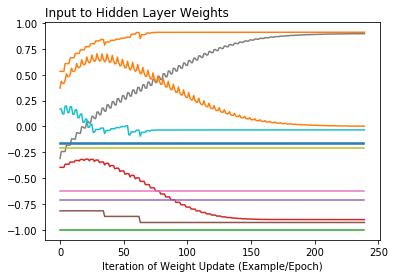

In [4]:
import pandas as pd

l0_1 = pd.DataFrame(l1_0_weights_)
l0_1.plot(legend=None)
plt.title('Input to Hidden Layer Weights', loc='left')
plt.xlabel('Iteration of Weight Update (Example/Epoch)')
plt.show()

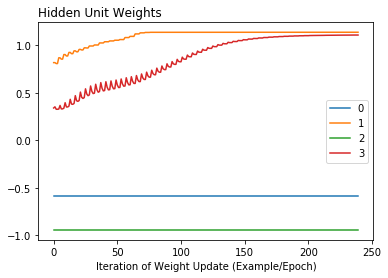

In [5]:
l2_1 = pd.DataFrame(l2_1_weights_)
l2_1.plot()
plt.title('Hidden Unit Weights', loc='left')
plt.xlabel('Iteration of Weight Update (Example/Epoch)')
plt.show()

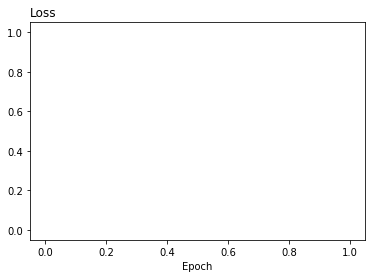

In [6]:
plt.plot(errors_)
plt.title('Loss', loc='left')
plt.xlabel('Epoch')
plt.show()

## Neural Networks with the MNIST Data
We'll baseline with a `logistic regression` so we understand what type of performance gain the neural network is providing us.

- 784 input neurons. 
- 10 output neurons (1 for each class).  
- 7,840 parameters to learn.  

In [7]:
from sklearn.datasets import fetch_openml
import datetime

st = datetime.datetime.now()

X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

en = datetime.datetime.now()
el = en - st

print(f'Fetch time: {el}')

X = X / 255.0

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

print(f'Training examples: {X_train.shape[0]:,}')
print(f'Test examples: {X_test.shape[0]:,}')

Fetch time: 0:00:39.025289
Training examples: 60,000
Test examples: 10,000


### Logistic Regression

In [8]:
from sklearn.linear_model import LogisticRegression
import datetime

st = datetime.datetime.now()

lr = LogisticRegression(solver='liblinear')
lr = lr.fit(X_train, y_train)

en = datetime.datetime.now()
el = en - st

print(f'Fit time: {el}')
print(f'Training set score: {lr.score(X_train, y_train):.2%}')
print(f'Test score: {lr.score(X_test, y_test):.2%}')


Fit time: 0:01:20.129380
Training set score: 92.79%
Test score: 92.03%


### [scikit-Learn Multi-layer Perceptron](https://scikit-learn.org/stable/modules/neural_networks_supervised.html)
Using the MNIST dataset, we'll train a neural net with `1-hidden layer` that contains `50-hidden units`.

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()

mlp = MLPClassifier(
    hidden_layer_sizes=(50,),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1,
)

mlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Training set score: {mlp.score(X_train, y_train):.2%}')
print(f'Test score: {mlp.score(X_test, y_test):.2%}')
print(f'\nTraining completed in {en-st}')

Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355
Iteration 11, loss = 0.04082169
Iteration 12, loss = 0.03828222
Iteration 13, loss = 0.03557957
Iteration 14, loss = 0.03054891
Iteration 15, loss = 0.02924761
Iteration 16, loss = 0.02610471
Iteration 17, loss = 0.02363894
Iteration 18, loss = 0.02208186
Iteration 19, loss = 0.01932900
Iteration 20, loss = 0.01830387
Iteration 21, loss = 0.01639227
Iteration 22, loss = 0.01392950
Iteration 23, loss = 0.01270193
Iteration 24, loss = 0.01234102
Iteration 25, loss = 0.01081313
Iteration 26, loss = 0.01028644
Iteration 27, loss = 0.00896707
Iteration 28, loss = 0.00744908
Iteration 29, loss = 0.00707946
Iteration 30, loss = 0.00573869
Iteration 31, loss = 0.00499554
Iteration 32, los

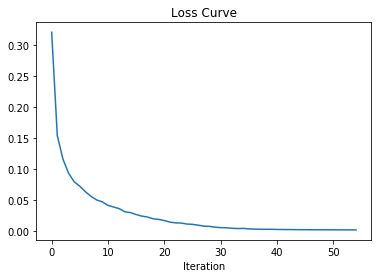

In [10]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.title('Loss Curve')
plt.show()

> Training stopped because the loss converged.

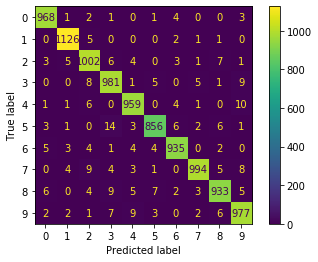

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()

### "Deep" Network on MNIST
- ANNs with more than 2 hidden layers are consider `deep` networks.  
- The example below will have 3 hidden layers, but it isn't uncommon for more complicated models to have hundreds of hidden layers, including ones that are more complicated than simple direct input/outputs.

In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
import datetime

st = datetime.datetime.now()
mlp = MLPClassifier(
    hidden_layer_sizes=(50,50,50),
    max_iter=100,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.1
)

mlp.fit(X_train, y_train)
en = datetime.datetime.now()

print(f'Training completed in {en-st}')
print(f'Training set score: {mlp.score(X_train, y_train):.2%}')
print(f'Test score: {mlp.score(X_test, y_test):.2%}')

Iteration 1, loss = 0.34132625
Iteration 2, loss = 0.13385624
Iteration 3, loss = 0.10517005
Iteration 4, loss = 0.08661185
Iteration 5, loss = 0.07296673
Iteration 6, loss = 0.06607626
Iteration 7, loss = 0.05712624
Iteration 8, loss = 0.05096139
Iteration 9, loss = 0.04894500
Iteration 10, loss = 0.04172744
Iteration 11, loss = 0.03804725
Iteration 12, loss = 0.03688750
Iteration 13, loss = 0.03458147
Iteration 14, loss = 0.03590979
Iteration 15, loss = 0.03016864
Iteration 16, loss = 0.02681141
Iteration 17, loss = 0.03102717
Iteration 18, loss = 0.02399110
Iteration 19, loss = 0.02525154
Iteration 20, loss = 0.02813208
Iteration 21, loss = 0.02282548
Iteration 22, loss = 0.02251492
Iteration 23, loss = 0.01943094
Iteration 24, loss = 0.02049333
Iteration 25, loss = 0.02261149
Iteration 26, loss = 0.01836079
Iteration 27, loss = 0.02339591
Iteration 28, loss = 0.02292981
Iteration 29, loss = 0.02181654
Iteration 30, loss = 0.01809922
Iteration 31, loss = 0.01587740
Iteration 32, los

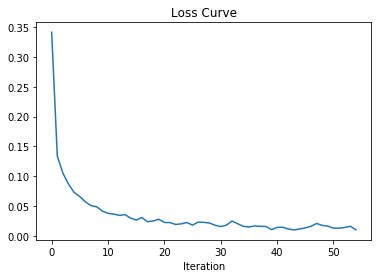

In [13]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Iteration')
plt.title('Loss Curve')
plt.show()

In [14]:
mlp.n_layers_

5

> `Input` + `Hidden Layer 1` + `Hidden Layer 2` + `Hidden Layer 3` + `Output Layer`

> The loss function is showing `a lot more roughness` here. Recall it has been smooth when we've looked at other models. If these gyrations where larger, it is possible the model could have gotten stuck in a local minima. The risk of that happening with deep neural networks is substantially larger than for the simpler models we have looked at previously.

- Training a model like this wasn't possible 35 years ago.

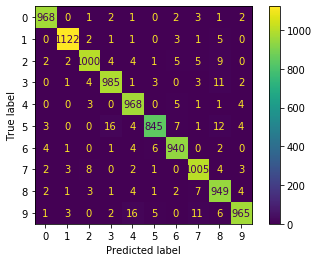

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(mlp, X_test, y_test)
plt.show()

> Single layer outperformed a multi-layer network. Deep isn't necessarily better - you need to grid search through the layers and units to determine the `best` values. In this case, a single 50-unit hidden layer performed about the same as two 50-unit hidden layers; so simple wins once again.

### Our `Deep Learning` Model Didn't Improve MNIST Performance
#### However, there's been significant progress on Deep Learning Models: 

<img src='files/diagrams/dnn-comparison.png'>

#### And Architectures Can be Complicated

<img src='files/diagrams/sample-dnn.png'>

[AlexNet](https://en.wikipedia.org/wiki/AlexNet)
<br>[VGG (Very Deep Convolutional Networks for Large-Scale Image Recognition)](https://arxiv.org/abs/1409.1556)
<br>[GoogleNet](https://www.cs.unc.edu/~wliu/papers/GoogLeNet.pdf)
> You can download pre-trained versions of these models.

#### Training Time
- Each model took about 1 minute to run.  
- Say we want to evaluate up to a 3-layer network.  
- We have no prior on the number of units so, we'd need to try several.  
- Grid could look like this:  
    - {'hidden_layer_sizes': (100,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75,), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50,), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100,), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75,), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50,), learning_rate = 0.001}.
    - {'hidden_layer_sizes': (100, 100,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75, 75, ), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50, 50, ), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100, 100, ), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75, 75, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50, 50, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (100, 75,), learning_rate = 0.0001}. 
    - {'hidden_layer_sizes': (75, 50, ), learning_rate = 0.0001}.  
    - {'hidden_layer_sizes': (50, 25, ), learning_rate = 0.0001}.
    - {'hidden_layer_sizes': (100, 75, ), learning_rate = 0.001}. 
    - {'hidden_layer_sizes': (75, 50, ), learning_rate = 0.001}.  
    - {'hidden_layer_sizes': (50, 25, ), learning_rate = 0.001}.  
    - ...

> Need to look to frameworks that allow for more efficient computation.

# [Keras](https://keras.io)
One of the more popular frameworks, that can scale to GPUs or TPUs, tl;dr it can run models fast (relatively speaking). Developed by `Francois Chollet`, who literally wrote the book on [Deep Learning with Python](https://www.manning.com/books/deep-learning-with-python).

Keras serves as a wrapper on [TensorFlow](https://www.tensorflow.org), but not all of TensorFlow's functionality is available in the Keras API.

GridSearch and Hyperparameter tuning can be done another package, [KerasTuner](https://keras.io/keras_tuner/).

### Simple Regression Example
- Similar to many of the models we've talked about, you can also use ANNs for regression problems.  
- Probably don't want to use activation functions for the outputs so the values are continuous and unbounded.  
- Loss is generally `mean squared error`, but another variant may be better dependent on your data, e.g., lots of outliers may warrant `mean absolute error` as a better choice.  
- Most regression problems will require 5 or fewer layers, with most requiring only 1 or 2.

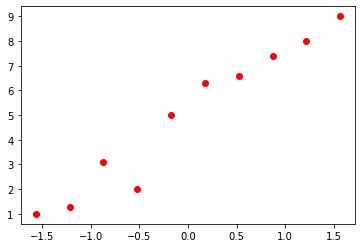

In [16]:
import numpy as np
import matplotlib.pyplot
%matplotlib inline

X_train = np.arange(10).reshape((10,1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

plt.plot(X_train_norm, y_train, 'ro')
plt.show()

#### Specify and fit the model
Linear regression only one ouput layer.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
coef (Dense)                 (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
None
Train on 10 samples
Epoch 1/100
10/10 [==============================] - 0s 18ms/sample - loss: 32.0158 - mae: 4.6012 - mse: 32.0158
Epoch 2/100
10/10 [==============================] - 0s 1ms/sample - loss: 21.3796 - mae: 3.7255 - mse: 21.3796
Epoch 3/100
10/10 [==============================] - 0s 872us/sample - loss: 14.3259 - mae: 3.0589 - mse: 14.3259
Epoch 4/100
10/10 [==============================] - 0s 908us/sample - loss: 9.6446 - mae: 2.5227 - mse: 9.6446
Epoch 5/100
10/10 [==============================] - 0s 898us/sample - loss: 6.5510 - mae: 2.0965 - mse: 6.5510
Epoch 6/100
10/10 [==============================] - 0s 908us/sample

10/10 [==============================] - 0s 930us/sample - loss: 0.4137 - mae: 0.4908 - mse: 0.4137
Epoch 70/100
10/10 [==============================] - 0s 958us/sample - loss: 0.4140 - mae: 0.4916 - mse: 0.4140
Epoch 71/100
10/10 [==============================] - 0s 971us/sample - loss: 0.4133 - mae: 0.4828 - mse: 0.4133
Epoch 72/100
10/10 [==============================] - 0s 918us/sample - loss: 0.4138 - mae: 0.4881 - mse: 0.4138
Epoch 73/100
10/10 [==============================] - 0s 937us/sample - loss: 0.4139 - mae: 0.4911 - mse: 0.4139
Epoch 74/100
10/10 [==============================] - 0s 965us/sample - loss: 0.4138 - mae: 0.4944 - mse: 0.4138
Epoch 75/100
10/10 [==============================] - 0s 912us/sample - loss: 0.4140 - mae: 0.4921 - mse: 0.4140
Epoch 76/100
10/10 [==============================] - 0s 879us/sample - loss: 0.4138 - mae: 0.4874 - mse: 0.4138
Epoch 77/100
10/10 [==============================] - 0s 928us/sample - loss: 0.4133 - mae: 0.4894 - mse: 0.4

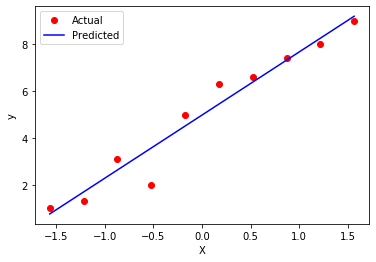

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

lm = keras.Sequential(
    [
        layers.Dense(1, activation='linear', input_dim=1, name='coef')
    ]
)

print(lm.summary())

lm.compile(loss="mse", optimizer="sgd", metrics=['mae', 'mse'])

lm.fit(X_train_norm, y_train, epochs=100, batch_size=1, verbose=1)

plt.plot(X_train_norm, y_train, 'ro')
plt.plot(X_train_norm, lm.predict(X_train_norm), 'b-')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(['Actual', 'Predicted'])
plt.show()

## Classification with MNIST
#### Still using the MNIST data, but sourcing it from Keras, it is stored in a slightly different format, but its the same data as in the scikit-learn example.

In [18]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
# 28 x 28 = 784

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [19]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Single Layer (aka `Logistic Regression`)
We will sequentially add layers to the model.  
- Input layer specifies the incoming data, i.e., the pixels.  
- The next layer specifies the layers, which includes the number of units and the activation function.  
- The final layer is the output layer, which is a `softmax` activation function since this is a multiclass problem.

In [20]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(num_classes, activation="softmax", name="Softmax")
    ], name='Logistic'
)
model.summary()

Model: "Logistic"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Softmax (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [21]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 1s 12us/sample - loss: 0.7203 - accuracy: 0.8216 - val_loss: 0.3513 - val_accuracy: 0.9122
Epoch 2/15
54000/54000 [==============================] - 0s 8us/sample - loss: 0.3796 - accuracy: 0.8989 - val_loss: 0.2858 - val_accuracy: 0.9248
Epoch 3/15
54000/54000 [==============================] - 0s 8us/sample - loss: 0.3324 - accuracy: 0.9088 - val_loss: 0.2611 - val_accuracy: 0.9293
Epoch 4/15
54000/54000 [==============================] - 0s 8us/sample - loss: 0.3104 - accuracy: 0.9140 - val_loss: 0.2526 - val_accuracy: 0.9315
Epoch 5/15
54000/54000 [==============================] - 0s 8us/sample - loss: 0.2974 - accuracy: 0.9179 - val_loss: 0.2442 - val_accuracy: 0.9333
Epoch 6/15
54000/54000 [==============================] - 0s 8us/sample - loss: 0.2884 - accuracy: 0.9196 - val_loss: 0.2365 - val_accuracy: 0.9368
Epoch 7/15
54000/54000 [==============================] - 0s 8

In [22]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.2629490202844143
Test accuracy: 0.928


### Multiple Hidden Layers

In [23]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(50, activation="relu", name="Hidden"),
        layers.Dense(50, activation="relu", name="Second"),
        layers.Dense(num_classes, activation="softmax", name='Output'),
    ], name='2_Hidden_Layers'
)
model.summary()

Model: "2_Hidden_Layers"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden (Dense)               (None, 50)                39250     
_________________________________________________________________
Second (Dense)               (None, 50)                2550      
_________________________________________________________________
Output (Dense)               (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


> `Need to learn 42,310 parameters!`

Potential issues:
- Vanishing gradients - they'll get smaller as the number of layers increase. May cause convergence issues.  
- In rarer cases, the gradients may increase and explode towards infinity.  
- Using ReLU makes these rarer; sigmoid is much more suspectible.  
    - It is possible for ReLU to only output `0` and many of the neurons will `die`. Leaky ReLU, $\phi(z)=max(\alpha z, z)$ guards against this issue.

> Sometimes you will need to normalize the output of the layer prior to moving it into the next layer, which is called `batch normalization`. It zero-centers and normalizes the outputs.

```python
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Flatten(name='Flatten'),
        layers.Dense(50, activation="relu", name="Hidden"),
        layers.BatchNormalization(),
        layers.Dense(50, activation="relu", name="Second"),
        layers.BatchNormalization(),
        layers.Dense(num_classes, activation="softmax", name='Output'),
    ], name='2-Hidden Layers'
)
```

Unfortunately, `BatchNormalization` has additional hyperparameters.

In [24]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 1s 14us/sample - loss: 0.4430 - accuracy: 0.8745 - val_loss: 0.1899 - val_accuracy: 0.9485
Epoch 2/15
54000/54000 [==============================] - 1s 9us/sample - loss: 0.2048 - accuracy: 0.9397 - val_loss: 0.1577 - val_accuracy: 0.9535
Epoch 3/15
54000/54000 [==============================] - 1s 9us/sample - loss: 0.1581 - accuracy: 0.9533 - val_loss: 0.1171 - val_accuracy: 0.9668
Epoch 4/15
54000/54000 [==============================] - 0s 9us/sample - loss: 0.1303 - accuracy: 0.9610 - val_loss: 0.1097 - val_accuracy: 0.9698
Epoch 5/15
54000/54000 [==============================] - 0s 9us/sample - loss: 0.1113 - accuracy: 0.9669 - val_loss: 0.1030 - val_accuracy: 0.9700
Epoch 6/15
54000/54000 [==============================] - 0s 9us/sample - loss: 0.0967 - accuracy: 0.9706 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 7/15
54000/54000 [==============================] - 1s 9

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.10492288558410946
Test accuracy: 0.9719


> Tip: You can use scikit-learn's GridSearchCV to search for the hyperparameters. Keras also has a tuner, see link in Reading.

## Regularizing
- Each layer has support for $l_2$ or $l_1$ regularization. See [the documentation](https://keras.io/api/layers/regularizers/).  
- Can also use `dropout`, which means we will drop a neuron with probability $p$ during a training step.  
    - Usually works better for earlier layers.  
    - Like $l_1$ and $l_2$, try if the model is overfitting.
  
#### Before
<img src='files/diagrams/holdout-before.png'>

#### After
<img src='files/diagrams/holdout-after.png'>


Example code:
```python
    keras.layers.Dropout(rate=0.2)
```

- If `dropout` after each layer is causing underfitting, try using with last layer only.  

## Additional Types of Advanced Neural Networks
- [Convolutional Networks](https://www.ibm.com/cloud/learn/convolutional-neural-networks)  
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder)  
- [Recurrent Neural Networks](https://en.wikipedia.org/wiki/Recurrent_neural_network)  
- [Generative Adversarial Networks](https://en.wikipedia.org/wiki/Generative_adversarial_network)  

### Convolutional Networks
- Common in image processing.  
- Deep networks of traditional hidden units grow $(size_{l-1}+1)size_l$ parameters, e.g., adding 1,000-unit layer to an existing NN will add more than 1,000,000 parameters. That would be challenging to solve computationally.  
- Way to isolate particular parts of the image, e.g., which section has the cat, which section of the cat has the tail, ....  
- With images, most nieghboring pixels represent the same thing, e.g., the individual blue pixels in the sky.  
- The edges of the objects, e.g., blue sky and white clouds, will generally be the only parts of the image with different neighbors.  
- Convolutional networks are looking to identify these areas of similar information and the edges.
- Can be viewed as feature extractors, e.g., edges and blobs of images.  
- For color images, generally use 3 versions of the image, one in each of the primary color scales (RGB).  

<img src='files/diagrams/architecture-cnn-en.jpeg' style='height: 500 px'>

[Image Source: Stanford CS230 Convolutional Neural Networks cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)

- [Convolutional layers](https://keras.io/api/layers/convolution_layers/convolution2d/) detect features by moving across the images in squares and multiplying them against a filter; think of it as scanning the image and "summarizing" the blocks.  
- The filter is specified in the convolution layers, and the matrix of weights are learned. These individual filters are concatonated into a kernel (i.e., matrix of weights).    
- Then it (usually) pools these scans, usually by taking the average or maximum - these aren't learnable, they just summarize the convolutional layers.

In [26]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ], name= 'Convolutional'
)

model.summary()

Model: "Convolutional"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)              

> Note the difference in the number of parameters the model needs to learn
- 34,826 for the Convolutional despite several more layers than the deep MLP.  
- 42,000 for the network with two hidden 50-unit layers.  

In [27]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, 
          batch_size=batch_size, 
          epochs=epochs, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 14s 258us/sample - loss: 0.3682 - accuracy: 0.8871 - val_loss: 0.0811 - val_accuracy: 0.9775
Epoch 2/15
54000/54000 [==============================] - 14s 256us/sample - loss: 0.1127 - accuracy: 0.9654 - val_loss: 0.0578 - val_accuracy: 0.9848
Epoch 3/15
54000/54000 [==============================] - 13s 247us/sample - loss: 0.0854 - accuracy: 0.9735 - val_loss: 0.0487 - val_accuracy: 0.9872
Epoch 4/15
54000/54000 [==============================] - 13s 248us/sample - loss: 0.0719 - accuracy: 0.9776 - val_loss: 0.0410 - val_accuracy: 0.9885
Epoch 5/15
54000/54000 [==============================] - 13s 246us/sample - loss: 0.0631 - accuracy: 0.9802 - val_loss: 0.0387 - val_accuracy: 0.9892
Epoch 6/15
54000/54000 [==============================] - 13s 248us/sample - loss: 0.0565 - accuracy: 0.9821 - val_loss: 0.0380 - val_accuracy: 0.9892
Epoch 7/15
54000/54000 [=====================

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.025271179190796102
Test accuracy: 0.9914


> Superior performance versus other ANNs we've tried on the MNIST data.

## Padding and Strides - Additional Convolutional Hyperparameters

Padding will pad zeroes around the raw the area where the filter is being applied. This can help define the boundaries between shapes/objects. This also gives the chance for each pixel to be at the center when the filter is being applied and help with feature detection in those areas of the image.

<img src='files/diagrams/padding.png'>

[Source: Hundred Page Machine Learning Book](https://www.dropbox.com/s/uh48e6wjs4w13t5/Chapter6.pdf?dl=0)

Stride is how much the window moves as it "scans" the image. A larger stride will decrease the size of the output and create a similar representation and can be used for compression. Generally, strides are down symmetrically.

<img src='files/diagrams/strides.png'>

Keras has options for both of these hyperparameters. [See the documentation for the Conv2D layer](https://keras.io/api/layers/convolution_layers/convolution2d/). Padding is implemented in its own layer, [see the documentation for it](https://keras.io/api/layers/reshaping_layers/zero_padding2d/). 

## Additional Neural Networks
- [Recurrent Neural Networks - Time series and language sequences](https://en.wikipedia.org/wiki/Recurrent_neural_network)  
- [Graph Neural Networks](https://arxiv.org/pdf/1812.08434.pdf)  
- [Autoencoders](https://en.wikipedia.org/wiki/Autoencoder)  
- [Generative Adversarial Networks](https://en.wikipedia.org/wiki/Generative_adversarial_network)

# Reading and Resources 
- [Origins of Deep Learning](https://arxiv.org/pdf/1702.07800.pdf)  
- [Andrew Ng - What is a Neural Network?](https://www.youtube.com/watch?v=n1l-9lIMW7E&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0&index=3)  
- [TensorFlow Clothing Classification](https://www.tensorflow.org/tutorials/keras/classification)  
- [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=xor&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=7,7,7,7,7&seed=0.02892&showTestData=true&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=true&ySquared=true&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&problem_hide=false&batchSize_hide=false&percTrainData_hide=false&numHiddenLayers_hide=false&playButton_hide=false&learningRate_hide=false&regularizationRate_hide=true&regularization_hide=true)  
- [MIT Introduction to Deep Learning](http://introtodeeplearning.com/slides/6S191_MIT_DeepLearning_L1.pdf)  
- [TensorFlow Data Pipelines](https://www.tensorflow.org/guide/data)  
- [Convolutional NN Example](https://www.tensorflow.org/tutorials/images/cnn)  
- [Stanford CS 230 on Convolutional Neural Networks](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)
- [DeepLearning AI Videos](https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w)  
- [Grid Search in Keras](https://keras.io/guides/keras_tuner/getting_started/)  
- [Forecasting Principles and Practice, Hyndman, Neural Network Models](https://otexts.com/fpp3/nnetar.html)  
- [IBM - What are Recurrent Neural Networks?](https://www.ibm.com/cloud/learn/recurrent-neural-networks)